Sprintの目的
スクラッチを通して線形回帰を理解する
オブジェクト指向を意識した実装に慣れる
数式をコードに落とし込めるようにする


このパラメータを更新するための手法が、最小二乗法と最急降下法です。

2.線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。


雛形


class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return


【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$



x
 : 特徴量ベクトル


θ
 : パラメータベクトル


n
 : 特徴量の数


x
j
 : j番目の特徴量


θ
j
 : j番目のパラメータ（重み）


特徴量の数
n
は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


$$
h_\theta(x) = \theta^T \cdot x.
$$
雛形


クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。



def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """
    pass
    return


In [47]:
#問題６に記載しました。


【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。


$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

α
 : 学習率


i
 : サンプルのインデックス


j
 : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。


1
2
3
4
5
def _gradient_descent(self, X, error):
    """
    説明を記述
    """
    pass

雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

In [48]:
#問題６に記載しました。

**これを数式で表すと下記のようになります。**

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$


### 損失関数（目的関数）

平均2乗誤差を最小にするΘを求めてきましたが、この対象となる誤差関数のことを、**損失関数（目的関数）**といいます。

Θの更新の際に、平均2乗誤差を使用していると紹介しましたが、厳密には、展開後の式を分かりやすくするため、下記の数式を利用しています。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

↓

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

どちらもΘについて微分し、係数を学習率に飲み込ませることで等価な式となります。

【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 
h
θ
(
x
)
 の出力が推定結果です。

In [49]:
#問題６に記載しました

【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$


m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）


雛形

def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    pass
    return mse

### 平均二乗誤差とは
平均二乗誤差とは教師データと予測値の残差を二乗し、訓練データ全ての点に対して足して平均を取ったものです。


式を分解して考えてみると、計算の順番は下記になるかと思います。

1. 推定結果を計算

$$
h_\theta(x_i) = \theta^T \cdot x_i
$$

2. 実測値との差を計算【対応する数式の個所を書いてください】

$$
error_i = h_\theta(x_i) - y_i
$$

3. 1,2の2乗を計算

$$
squared error_i = error_i^2
$$

4. 3の合計値を計算【対応する数式の個所を書いてください】

$$
sum squared error = \sum_{i=1}^{m} squared error_i
$$

5. データの長さで割って4の平均値を計算

$$
mean squared error = \sum_{i=1}^{m} squared error_i
$$

ひな形では、推定結果と教師データが既に与えられるようにしています。

ヒント：numpyの各種関数を利用してみましょう。

### トイデータ

作成した関数に、下記の変数を引数として与えてみましょう。

```python
import numpy as np
y_pred = np.array([0,1,2,3,4,5])
y = np.array([1,3,5,7,9,11])
```

戻り値として、下記の出力があれば、正常に作成できています。

In [50]:
# 問題4
import numpy as np

def MSE(y_pred, Y):
      """
      平均二乗誤差の計算
      Parameters
      ----------
      y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
      y : 次の形のndarray, shape (n_samples,)
        正解値
      Returns
      ----------
      mse : numpy.float
        平均二乗誤差
      """
      mse=0
      for i in  range(len(y_pred)):
        mse += ((y_pred[i] - y[i])**2)
      mse = mse/ len(y_pred)
      return mse

y_pred = np.array([0,1,2,3,4,5])
y_pred=y_pred.tolist()

y = np.array([1,3,5,7,9,11])
y=y.tolist()

mse=MSE(y_pred, y)
print(mse)


15.166666666666666


In [51]:
from sklearn.metrics import mean_squared_error
y_true = np.array([1,3,5,7,9,11])
y_pred = np.array([0,1,2,3,4,5])
mean_squared_error(y_true, y_pred)

15.166666666666666

【問題４まとめ】

スクラッチで書いたMSEの出力値とsklearn.metrics のmean_squared_error出力値が一致している

【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） 
J
(
θ
)
 は次の式です。


$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$


m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解値

 

In [52]:
#問題６に記載しました

【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

予測値 は、  181324.8


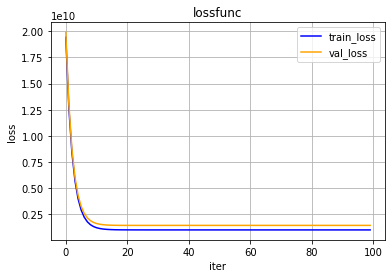

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter;
        self.lr = lr;
        self.no_bias = no_bias;
        self.verbose = verbose;
        # 損失を記録する配列を用意
        # self.loss = np.zeros(self.iter)
        # self.loss = self.loss.tolist()
        # self.val_loss = np.zeros(self.iter)
        self.theta = np.array([])  # 初期値
        self.theta2 = np.array([])  # 初期値
        self.loss = np.array([])  # 初期値
        self.val_loss = np.array([])  # 初期値
        # x = np.array( [] )
        self.iter2 = np.array([])  # 初期値
        self.iter2 = self.iter2.tolist()
      

# 問題6（学習と推定）
    def fit(self, X, y, X_val, y_val):
        """
        線形回帰の学習検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        m = X.shape[0]
        hoge = np.ones((m, 1))
        X = np.hstack((hoge,X))

        m2 = X_val.shape[0]
        hoge2 = np.ones((m2, 1))
        X_val = np.hstack((hoge2,X_val))
                            
        self.theta = np.zeros(X.shape[1]) #X.shape[1]：行列Xの列数を表す。np.zeros(X.shape[1])で、列数がX.shape[1]である０だけで構成される行列を作成している
        self.theta = self.theta.reshape(X.shape[1],1) #上記だと１次元配列なので、２次元にする為にreshape(Xの列数＋１（列が全て１の列）,1)にしている
        # print("self.theta")
        # print(self.theta)
        y_true = y
        # print(y_true)
        # print(X)
        self.theta2 = np.zeros(X_val.shape[1]) #X.shape[1]：行列Xの列数を表す。np.zeros(X.shape[1])で、列数がX.shape[1]である０だけで構成される行列を作成している
        self.theta2 = self.theta2.reshape(X_val.shape[1],1) #上記だと１次元配列なので、２次元にする為にreshape(Xの列数＋１（列が全て１の列）,1)にしている
        # print("self.theta")
        # print(self.theta)
        y_true2 = y_val
        # print(y_true)
        # print(X)

        # メイン処理
        for k in range(self.iter):
            # print("イテレーション{}回目".format(k))

            #問題１解答
            h = self._linear_hypothesis(X)
            # print("h")
            # print(h)
            h2 = self._linear_hypothesis(X_val)
            # print("h2")
            # print(h2)

            # 問題2解答（最急降下法によるパラメータの更新値計算）
            self.theta = self._gradient_descent(X,y_true,h)
            # print("self.theta")
            # print(self.theta)
            self.theta2 = self._gradient_descent(X_val,y_true2,h2)
            # print("self.theta2")
            # print(self.theta2)
           
            # 問題7解答（学習曲線のプロット）のグラフ描画時（問題5（損失関数）で作成した関数を使用）
            #損失関数グラフ化（学習データと検証データ比較）
            if(self.verbose ==True):
              loss= self._loss_func(h, y_true)
              loss2= self._loss_func(h2, y_true2)
              self.iter2.append(k)
              self.loss = np.append( self.loss, loss ) #物凄く時間がかかった所。（空ののself.lossにnumpy ndarrayの要素を追加する方法）
              self.val_loss = np.append( self.val_loss, loss2 )
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.title("lossfunc")
        plt.xlabel("iter")
        plt.ylabel("loss")
        ax.plot(self.iter2,self.loss, "b", label="train_loss")
        ax.plot(self.iter2,self.val_loss, "orange", label="val_loss")
        ax.grid(axis='both')
        # 凡例の表示
        ax.legend()
       



    # 問題1
    def _linear_hypothesis(self,X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        h = X @ self.theta
        return h

    # 問題2解答
    def _gradient_descent(self,X,y_true,h):
        """
        最急降下法によるパラメータの更新値計算
        適当な重みIrを掛けてθが小さくなる方へ徐々に転がっていくようにする
         X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
         y_true : 入力するモデルの学習に使用する正解値
        Returns
        -------
        hθ(X)=yhθ(X)=yからのズレを定量化してそのズレを最小化するようなθ
        次の値になるθ
        """
        m=X.shape[0] #n_samplesサンプル数
        n=X.shape[1] #n_features特徴量の数
        for j in range(n):
          gradient = 0
          for i in range(m): #X.shape[0]は、Xの行数分を表す
            gradient += (h[i] - y_true[i])*X[i,j]
          self.theta[j] = self.theta[j] - self.lr /(m) * gradient 
          """
          ('210801に、この１行(上記のself.theta[j]・・・* gradient )のインデントが上（gradient += ・・・）と同じだった。
          そうすると住宅価格の予測値を出すと膨大な数値なった。原因は、このインデントが間違っていた。
          前に出して修正した。再急降下法の式を見ると、シグマ内にθはないので、前に出さないといけなかった。)
          """
          # print("gradient")
          # print(gradient)
        return self.theta

        


    # 問題3解答
    def predict(self,X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        m = X.shape[0]
        hoge = np.ones((m, 1))
        X = np.hstack((hoge,X))
                            
        y_pred = self._linear_hypothesis(X)
        return y_pred

    # # 問題4
    # def _mse(self,y_pred, Y):
    #       """
    #       平均二乗誤差の計算
    #       Parameters
    #       ----------
    #       y_pred : 次の形のndarray, shape (n_samples,)
    #         推定した値
    #       y : 次の形のndarray, shape (n_samples,)
    #         正解値
    #       Returns
    #       ----------
    #       mse : numpy.float
    #         平均二乗誤差
    #       """
    #       mse = np.mean((y_pred - Y)**2)
    #       # pass
    #       return mse


    # 問題5解答
    def _loss_func(self,h, y_true):
      """
      損失関数の計算
      Parameters
      ----------
      y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
      y : 次の形のndarray, shape (n_samples,)
        正解値
      Returns
      ----------
      lossfunc
        損失値
      """
      # print("y_true")
      # print(y_true)
      m2=y_true.shape[0] #n_samplesサンプル数
      loss =0
      for i in  range(m2):
        loss += ((h[i] - y_true[i])**2)
      loss2 = loss/ (2*m2)
      # print("loss2")
      # print(loss2)
      return loss2





df = pd.read_csv('/content/drive/MyDrive/DIC/train.csv')


x=df.loc[:,['GrLivArea','YearBuilt']]
X=x.values
# print(x)

y = df.loc[:, 'SalePrice']
y=y.values
# print(y)


np.random.seed(1234)



#トレーニングデータとテストデータに分けて実行してみる------------------
X_train6, X_test6, train_label6, test_label6=train_test_split(X, y, train_size=0.8,random_state=0)
# print("X_train6")
# print(X_train6.shape)
scaler = StandardScaler()
scaler.fit(X_train6)
X_train6=scaler.transform(X_train6)
X_test6=scaler.transform(X_test6)

#ScratchLinearRegressionクラスのモデルのインスタンス化をregに代入
reg=ScratchLinearRegression(num_iter=100, lr=0.1, no_bias=True, verbose=True)
reg.fit(X_train6, train_label6, X_test6, test_label6)

# print(X_test6)

#予測値を求める
pre6=reg.predict(X_test6)
# print(pre6)
print("予測値 は、 ",'{:.1f}'.format(pre6.mean()))





【問題6】学習と推定の結果

ScratchLinearRegressionクラスの予測値が約１８万になった。以下に記載した【scikit-learnによる実装】による予測値も約１８万で一致している。

In [54]:
#【scikit-learnによる実装】
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import os
# os.listdir()
# print(os.pwd)
df = pd.read_csv('/content/drive/MyDrive/DIC/train.csv')
# print(df)

x=df.loc[:,['GrLivArea','YearBuilt']]
# print(type(x))
# print(x)

target = df.loc[:, ['SalePrice']]
# print(target[:])
# print(type(target))

X=x
X = X.sample(n=500, random_state=0)#サンプル数を5００へ絞り込み
X=X.values
# print(X)

# 目的変数
Y = target
Y = Y.sample(n=500, random_state=0)#サンプル数を5００へ絞り込み
y6=Y.values



import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(0)


#トレーニングデータとテストデータに分けて実行してみる------------------
X_train6, X_test6, train_label6, test_label6=train_test_split(X, y6, train_size=0.8,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train6)
X_train6=scaler.transform(X_train6)

scaler.fit(X_test6)
X_test6=scaler.transform(X_test6)

# LinearRegression
reg = LinearRegression()
reg.fit(X_train6, train_label6)

#予測値を求める
pre6=reg.predict(X_test6)
# print(pre6)
# print(pre6.mean())
print("予測値 は、 ",'{:.1f}'.format(pre6.mean()))


予測値 は、  180294.7


【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。





In [55]:
#問題６に記載しました